In [1]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dataset=pd.read_csv("E:/reviews.csv")
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
dataset=dataset.dropna()
dataset.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [4]:
dataset=dataset.drop(["Id","ProductId","UserId"],axis=1)
dataset.keys()

Index(['ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [5]:
dataset["Time"]=(dataset["Time"]-dataset["Time"].min())/dataset["Time"].max()-dataset["Time"].min()
dataset["Time"]

0        -9.393408e+08
1        -9.393408e+08
2        -9.393408e+08
3        -9.393408e+08
4        -9.393408e+08
5        -9.393408e+08
6        -9.393408e+08
7        -9.393408e+08
8        -9.393408e+08
9        -9.393408e+08
10       -9.393408e+08
11       -9.393408e+08
12       -9.393408e+08
13       -9.393408e+08
14       -9.393408e+08
15       -9.393408e+08
16       -9.393408e+08
17       -9.393408e+08
18       -9.393408e+08
19       -9.393408e+08
20       -9.393408e+08
21       -9.393408e+08
22       -9.393408e+08
23       -9.393408e+08
24       -9.393408e+08
25       -9.393408e+08
26       -9.393408e+08
27       -9.393408e+08
28       -9.393408e+08
29       -9.393408e+08
              ...     
568424   -9.393408e+08
568425   -9.393408e+08
568426   -9.393408e+08
568427   -9.393408e+08
568428   -9.393408e+08
568429   -9.393408e+08
568430   -9.393408e+08
568431   -9.393408e+08
568432   -9.393408e+08
568433   -9.393408e+08
568434   -9.393408e+08
568435   -9.393408e+08
568436   -9

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
HelpfulnessNumerator,1.000000,0.974849,-0.032594,-0.154646
HelpfulnessDenominator,0.974849,1.000000,-0.097808,-0.172815
Score,-0.032594,-0.097808,1.000000,-0.062881
Time,-0.154646,-0.172815,-0.062881,1.000000


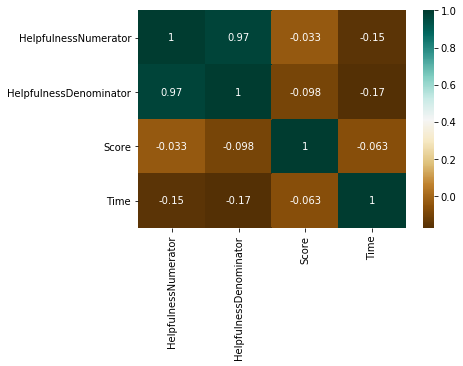

In [6]:
import seaborn as sns
c=dataset.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c


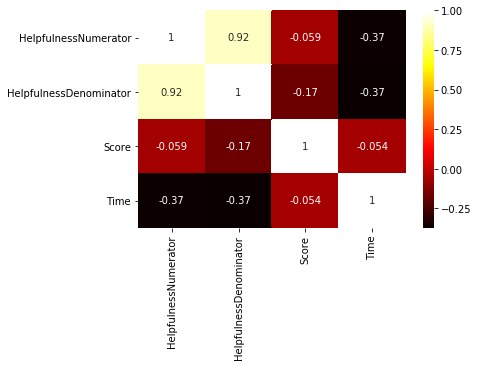

In [7]:
c= dataset.corr(method="spearman")
sns.heatmap(c,cmap="hot",annot=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["ProfileName"]=le.fit_transform(dataset["ProfileName"])

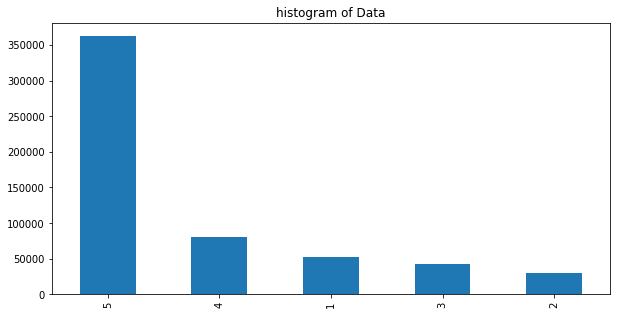

In [9]:
dataset.Score.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("histogram of Data")
plt.show()

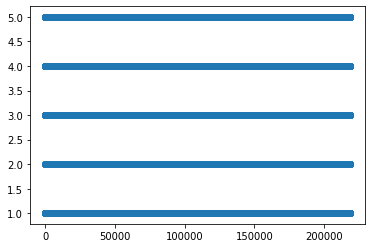

In [10]:
plt.scatter(x="ProfileName",y="Score",data=dataset)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec11125a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec11125e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec11128d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1ec1111bd68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ec11100b38>],
 'means': []}

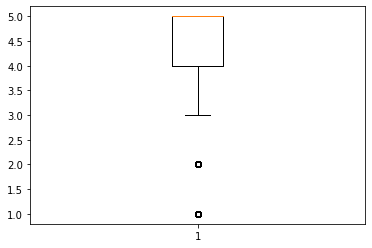

In [77]:
plt.boxplot("Score",data=dataset)

In [11]:
len(dataset["Text"])

568411

In [12]:
def clean_text(text, remove_stopwords = True):
    
    text = text.lower()
    text = text.split()
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', str(text), flags=re.MULTILINE)
    textxt=re.sub('[^a-z,A-Z]','',str(text))
    text = re.sub(r'<br />', ' ', str(text))
    text = re.sub(r'\'', ' ', str(text))
    
    # Optionally, remove stop words
    if remove_stopwords:
        ps=PorterStemmer()
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [ps.stem(w) for w in text if not w in stops]
        text = " ".join(text)

    return text


In [13]:
reviews = dataset.drop(['ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time'],axis=1)

In [14]:
reviews = reviews.reset_index(drop=True)


In [15]:
clean_summaries = []
for summary in reviews.Summary:
    clean_summaries.append(clean_text(summary, remove_stopwords=False))

In [16]:
clean_summaries

['[ good ,  quality ,  dog ,  food ]',
 '[ not ,  as ,  advertised ]',
 '[ "delight" ,  says ,  it ,  all ]',
 '[ cough ,  medicine ]',
 '[ great ,  taffy ]',
 '[ nice ,  taffy ]',
 '[ great! ,  just ,  as ,  good ,  as ,  the ,  expensive ,  brands! ]',
 '[ wonderful, ,  tasty ,  taffy ]',
 '[ yay ,  barley ]',
 '[ healthy ,  dog ,  food ]',
 '[ the ,  best ,  hot ,  sauce ,  in ,  the ,  world ]',
 '[ my ,  cats ,  love ,  this ,  "diet" ,  food ,  better ,  than ,  their ,  regular ,  food ]',
 '[ my ,  cats ,  are ,  not ,  fans ,  of ,  the ,  new ,  food ]',
 '[ fresh ,  and ,  greasy! ]',
 '[ strawberry ,  twizzlers ,  - ,  yummy ]',
 '[ lots ,  of ,  twizzlers, ,  just ,  what ,  you ,  expect. ]',
 '[ poor ,  taste ]',
 '[ love ,  it! ]',
 '[ great ,  sweet ,  candy! ]',
 '[ home ,  delivered ,  twizlers ]',
 '[ always ,  fresh ]',
 '[ twizzlers ]',
 '[ delicious ,  product! ]',
 '[ twizzlers ]',
 '[ please ,  sell ,  these ,  in ,  mexico!! ]',
 '[ twizzlers ,  - ,  strawberr

In [17]:
clean_texts = []
for text in reviews.Text:
    clean_texts.append(clean_text(text))

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=7)

In [21]:
s=cv.fit_transform(clean_texts).toarray()
dataset["Clean_texts"]=s

In [26]:
s1=cv.fit_transform(clean_summaries).toarray()
dataset["clean_summaries"]=s1

In [ ]:
dataset.drop(["Text"],1)

In [27]:
len(clean_summaries)

568411

In [29]:
dataset.head()

,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Clean_texts,clean_summaries
0,190354,1,1,5,-9.393408e+08,Good Quality Dog Food,0,0
1,190861,0,0,1,-9.393408e+08,Not as Advertised,0,0
2,128379,1,1,4,-9.393408e+08,"""Delight"" says it all",0,0
3,92147,3,3,2,-9.393408e+08,Cough Medicine,0,0
4,120307,0,0,5,-9.393408e+08,Great taffy,0,0


In [52]:
dataset["Summary"]=le.fit_transform(dataset["Summary"])
dataset.head()

,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Clean_texts,clean_summaries
0,190354,1,1,5,-9.393408e+08,83434,0,0
1,190861,0,0,1,-9.393408e+08,167648,0,0
2,128379,1,1,4,-9.393408e+08,126,0,0
3,92147,3,3,2,-9.393408e+08,47071,0,0
4,120307,0,0,5,-9.393408e+08,107323,0,0


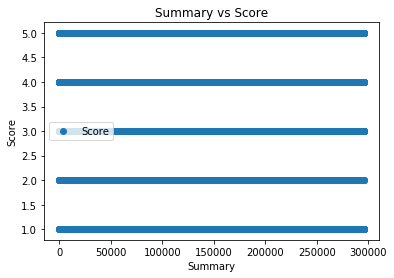

In [76]:
plt.scatter("Summary","Score",data=dataset)
plt.legend()
plt.title("Summary vs Score")
plt.xlabel("Summary")
plt.ylabel("Score")
plt.show()

In [53]:

X = dataset.drop(["clean_summaries"], axis=1)
y = dataset['clean_summaries']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
X_train=X_train.dropna()
y_train=y_train.dropna()

In [58]:
model=LinearRegression()

In [59]:
X_train.head(2)

,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Clean_texts
353445,47416,0,0,5,-9.393408e+08,285127,0
365306,90795,0,0,4,-9.393408e+08,221826,2


In [60]:
y_train.head(2)

353445    0
365306    0
Name: clean_summaries, dtype: int64

In [61]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
pred=model.predict(X_test)

In [65]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
accuracies

array([0.0030206 , 0.00363663, 0.00310956, 0.00261211, 0.0039725 ,
       0.00337331, 0.00219475, 0.00220382, 0.00222924, 0.00324273])

In [66]:
from sklearn.ensemble import RandomForestRegressor 

In [67]:
rfr=RandomForestRegressor()

In [68]:
rfr.fit(X_train,y_train)

C:\Users\tharu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [78]:
pred1=rfr.predict(X_test)

In [70]:
rfr.score(X_test,y_test)

0.42296773142554267

In [72]:
accuracies1 = cross_val_score(estimator=rfr, X=X_train, y=y_train, cv=10)
accuracies1

array([0.4196944 , 0.42399646, 0.4173038 , 0.41952911, 0.38882916,
       0.42806524, 0.41485486, 0.42509609, 0.42122887, 0.42453783])